In [3]:
# Trabalho 1 - Geração de imagens
# SCC0251 - Image Processing (01/2021)
# Fabiana Dalacqua - 
# Pedro Henrique Nieuwenhoff - 10377729
import numpy as np
import numpy.random
import imageio
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [62]:
r = str(input()) # nome do arquivo contendo a imagem de referência
C = int(input()) # tamanho lateral da imagem sintetizada C(assuma que a imagem é quadrada e que seu tamanho é CxC)
F = int(input()) # a função F que será usada para geração
Q = int(input()) # o parâmetro Q, usado para geração de imagens
N = int(input()) # o tamanho lateralNda imagem amostrada, onde N<=C
B = int(input()) # número de bits por pixel B, com 1<=B<=8
S = int(input()) # seed S para ser usado com as funções aleatórias

ex1.npy
512
1
2
256
4
1


In [72]:
# definindo a seed das funções aleatórias
np.random.seed(S)

In [73]:
# definição das funções geradoras das imagens
def function_1(x,y):
    return (x*y + 2*y)

def function_2(x,y):
    return abs(np.cos(x/Q) + 2*np.sin(y/Q))

def function_3(x,y):
    return abs(3*(x/Q) - np.cbrt(y/Q))
    
def function_4():
    return np.random.rand()

def function_5(x,dx):
    return (x + dx)%C

In [77]:
r_array = np.load(r) # carrega a imagem de referência
img_sint = np.zeros((C,C), float) # imagem sintetizada inicial (tudo zero)

(512, 512)


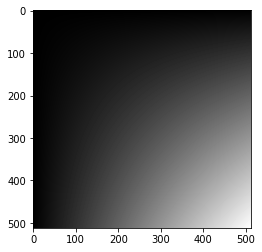

In [78]:
if F == 1:
    for x in range(C):
        for y in range(C):
            img_sint[x,y] = function_1(x,y)
elif F == 2:
    for x in range(C):
        for y in range(C):
            img_sint[x,y] = function_2(x,y)
elif F == 3:
    for x in range(C):
        for y in range(C):
            img_sint[x,y] = function_3(x,y)
elif F == 4:
    for y in range(C):
        for x in range(C):
            img_sint[x,y] = function_4()
else:
    img_sint[0,0] = 1
    for i in range(1+np.power(C,2)):
        dx = np.random.randint(-1,1)
        dy = np.random.randint(-1,1)
        img_sint[function_5(x,dx), function_5(y,dy)] = 1
            
print(img_sint.shape)
plt.imshow(img_sint, cmap="gray") #mostra a imagem


[[     0.      4.      8. ...   1012.   1016.   1020.]
 [     0.      8.     16. ...   2024.   2032.   2040.]
 [     0.     12.     24. ...   3036.   3048.   3060.]
 ...
 [     0.   1016.   2032. ... 257048. 258064. 259080.]
 [     0.   1020.   2040. ... 258060. 259080. 260100.]
 [     0.   1024.   2048. ... 259072. 260096. 261120.]]
(256, 256)


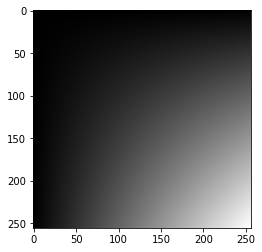

In [79]:
# downsampling
def downsampling(img):
    dim_sampling = N
    img_sampling = np.zeros((dim_sampling,dim_sampling))
    
    x = 0
    for x_sampling in range(dim_sampling):
        y = 0
        for y_sampling in range(dim_sampling):
            img_sampling[x_sampling,y_sampling] = img[x,y]
            y += int(C/N)
        
        y -= int(C/N)
        img_sampling[x_sampling,y_sampling] = img[x,y]
        x += int(C/N)
        
    return img_sampling


img_sint = downsampling(img_sint)
print(img_sint)
print(img_sint.shape)
plt.imshow(img_sint, cmap="gray") #mostra a imagem
